In [46]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from IPython.display import display

# Mask RCNN
import tensorflow as tf
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

%load_ext autoreload
%autoreload 2

import utils
import vesicle
import result

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Конфиг

In [17]:
# Данные
DATA_DIR = 'data/val/'
OUTPUT_DIR = 'data/out/'

# Модель
MODEL_DIR = 'models'
# WEIGHTS_PATH = 'models/mask_rcnn_vesicle_0014.h5'
WEIGHTS_PATH = 'logs/augment2/vesicle20181026T1754/mask_rcnn_vesicle_0013.h5'
DEVICE = '/cpu:0'

# Визуализация
DRAW_CONTOURS = True
DRAW_ELLIPSES = True
PALETTE = [(255, 0, 0), (0, 255, 0), (0, 0, 255)] #rgb

### Загрузка данных

In [18]:
config = vesicle.VesicleInferenceConfig()
images = utils.load_images(DATA_DIR)

In [19]:
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

model.load_weights(WEIGHTS_PATH, by_name=True)

Re-starting from epoch 13


### Классификация

In [39]:
results_dict = {}
for name, img in images.items():
    print(name)
    %time results_dict[name], = model.detect([img], verbose=0)

07_80K.png
CPU times: user 29.2 s, sys: 1.33 s, total: 30.5 s
Wall time: 8.39 s
03_80K (1).png
CPU times: user 30.5 s, sys: 1.53 s, total: 32 s
Wall time: 8.82 s
04_80K.png
CPU times: user 31.2 s, sys: 1.43 s, total: 32.7 s
Wall time: 9.03 s
08_80K (1).png
CPU times: user 31.5 s, sys: 1.6 s, total: 33.1 s
Wall time: 9.34 s
04_150k.png
CPU times: user 32 s, sys: 1.44 s, total: 33.4 s
Wall time: 9.19 s
09_80K.png
CPU times: user 31.5 s, sys: 1.64 s, total: 33.2 s
Wall time: 9.61 s
08_80K.png
CPU times: user 31 s, sys: 2.01 s, total: 33 s
Wall time: 10.7 s
06_80K (2).png
CPU times: user 32.1 s, sys: 1.53 s, total: 33.7 s
Wall time: 9.56 s
01_80K (2).png
CPU times: user 32.4 s, sys: 1.54 s, total: 34 s
Wall time: 9.44 s
05_80K.png
CPU times: user 32.3 s, sys: 1.66 s, total: 34 s
Wall time: 9.66 s


In [32]:
imgs_copy = copy.deepcopy(images)
params_dict = result.get_params_from_results(results)
result.visualize_all_params(imgs_copy, params_dict)
result.get_params_and_visualize(imgs_copy, results)
utils.write_images(imgs_copy, OUTPUT_DIR)

In [54]:
results = result.ResultWrapper(results_dict)
df = results.get_df()
df.to_excel()
display(df)
display(df.describe())

name  id     score          a          b     area
0       07_80K.png   0  0.999510  59.996269  58.062588  10787.5
1       07_80K.png   1  0.999238  37.972153  24.034369   2812.5
2       07_80K.png   2  0.998601  51.387375  50.775562   8070.5
3       07_80K.png   3  0.998589  31.562069  27.568804   2668.5
4       07_80K.png   4  0.997456  37.597466  27.486656   3093.0
5       07_80K.png   5  0.996049  17.032373  15.132344    785.5
6       07_80K.png   6  0.626331  21.373808  17.854992   1147.0
7       09_80K.png   0  0.997363  14.836892  11.365055    498.5
8       09_80K.png   1  0.996967  15.132448  14.352612    666.5
9       09_80K.png   2  0.991727  20.692133  15.927446    947.0
10      09_80K.png   3  0.967793  42.934704  38.673115   4862.0
11      09_80K.png   4  0.948885  43.032135  37.251106   4961.0
12      09_80K.png   5  0.811062  29.265137  27.902771   2539.0
13      09_80K.png   6  0.712901  11.120900   9.835227    324.5
14  03_80K (1).png   0  0.999725  19.626070  19.361912   1164.5
15  03_80K (1).png   1  0.994011  16.180689  14.954750    726.5
16  03_80K (1).png   2  0.992774  15.243854  13.476510    629.5
17  03_80K (1).png   3  0.980537  21.761951  17.525225   1142.5
18  03_80K (1).png   4  0.947073  18.565378  15.002565    854.0
19  08_80K (1).png   0  0.999832  24.084522  21.042067   1538.0
20  08_80K (1).png   1  0.999645  29.193989  26.943649   2363.5
21  08_80K (1).png   2  0.982379  20.755541  17.779497   1073.5
22     04_150k.png   0  0.924683  50.625732  36.289341   4547.5
23     04_150k.png   1  0.608979  66.121971  56.076172  10579.5
24      08_80K.png   0  0.964001  17.945564  15.947814    806.5
25      08_80K.png   1  0.908810  15.337052   9.477304    414.0
26      08_80K.png   2  0.832074  12.031949  10.124959    357.0
27      08_80K.png   3  0.798541  11.824502  10.859210    387.0
28  06_80K (2).png   0  0.999897  30.428823  21.480213   1974.5
29  06_80K (2).png   1  0.999732  24.393829  23.770710   1757.5
30  06_80K (2).png   2  0.991489  18.772516  17.053946    937.0
31      04_80K.png   0  0.999801  25.857489  23.495941   1870.0
32      04_80K.png   1  0.999166  58.036690  46.416534   8012.0
33      04_80K.png   2  0.998515  26.992615  23.172680   1879.5
34      04_80K.png   3  0.961155  63.163757  49.374916   9471.0
35      04_80K.png   4  0.937592  30.419378  22.666719   2016.0
36      04_80K.png   5  0.615763  28.037769  20.579973   1728.5
37      05_80K.png   0  0.999729  38.160240  35.853313   4195.5
38      05_80K.png   1  0.996963  49.122784  31.394169   4784.0
39      05_80K.png   2  0.931949  31.970829  25.700972   2371.5
40      05_80K.png   3  0.672282  17.998108  12.152823    666.0
41  01_80K (2).png   0  0.999760  40.153141  38.050629   4715.5
42  01_80K (2).png   1  0.999611  39.402493  34.955635   4258.0
43  01_80K (2).png   2  0.990979  21.359358  20.488411   1324.5

id      score          a          b          area
count  44.000000  44.000000  44.000000  44.000000     44.000000
mean    2.022727   0.933407  29.943283  25.174800   2788.806818
std     1.745275   0.115353  14.828456  12.740669   2786.417491
min     0.000000   0.608979  11.120900   9.477304    324.500000
25%     1.000000   0.936181  18.423561  15.728671    842.125000
50%     2.000000   0.992250  26.425052  22.073466   1813.750000
75%     3.000000   0.999184  38.470803  32.284535   4211.125000
max     6.000000   0.999897  66.121971  58.062588  10787.500000

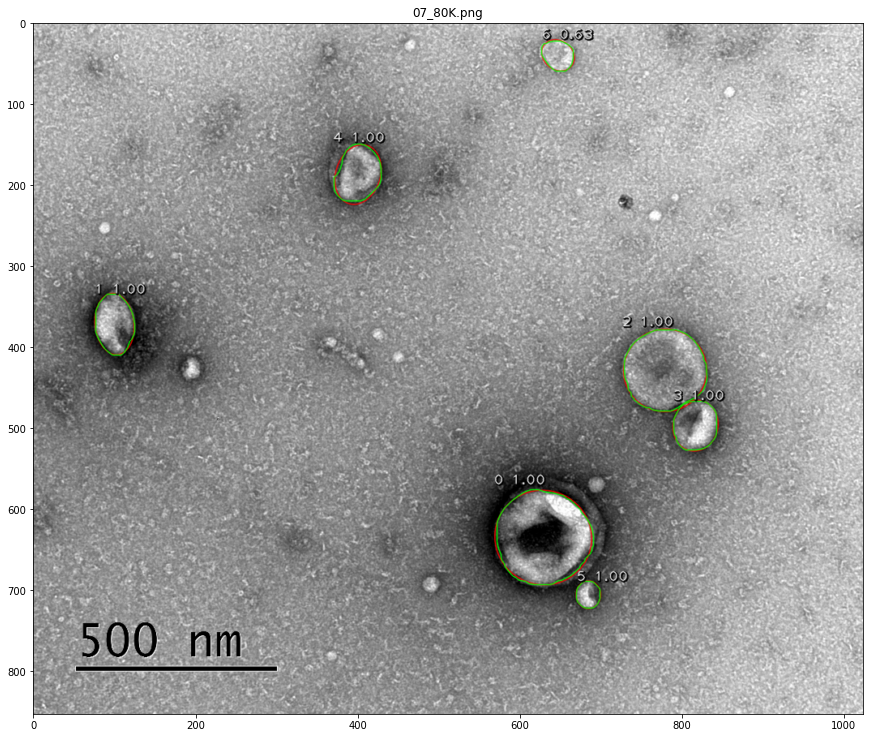

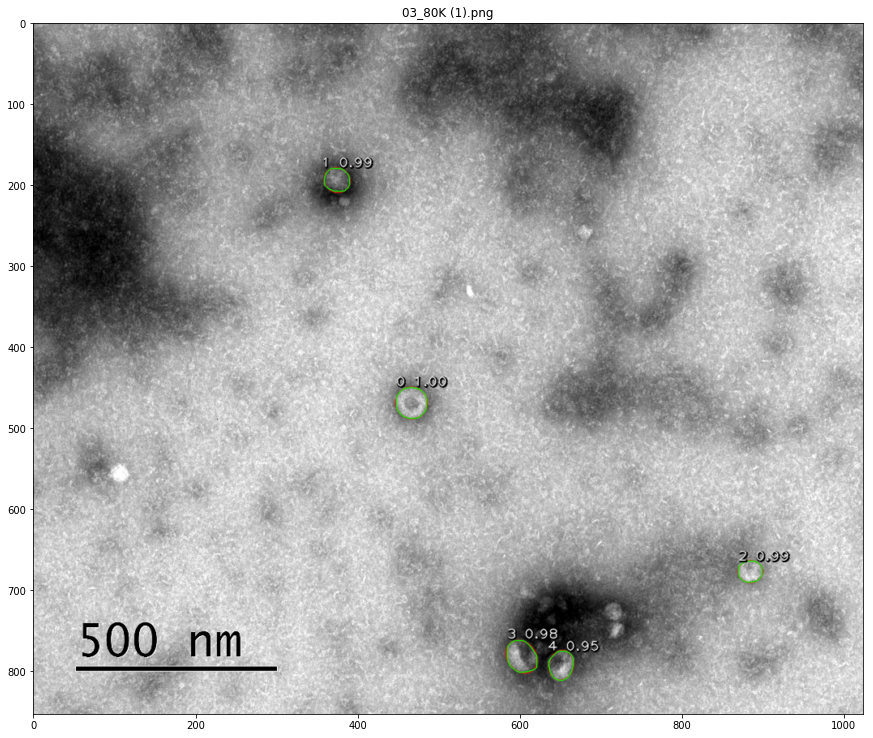

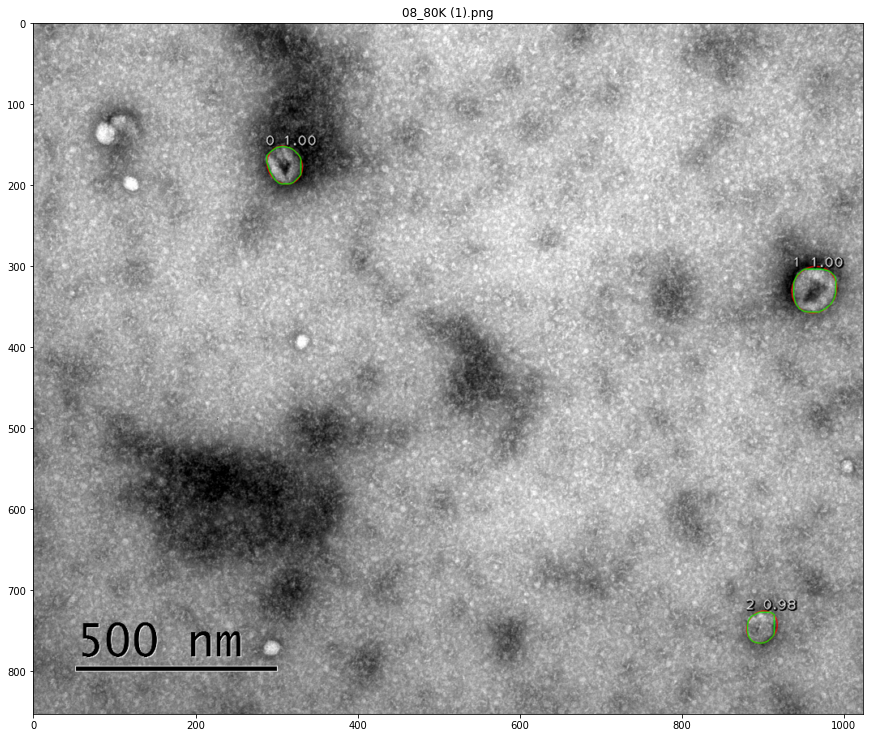

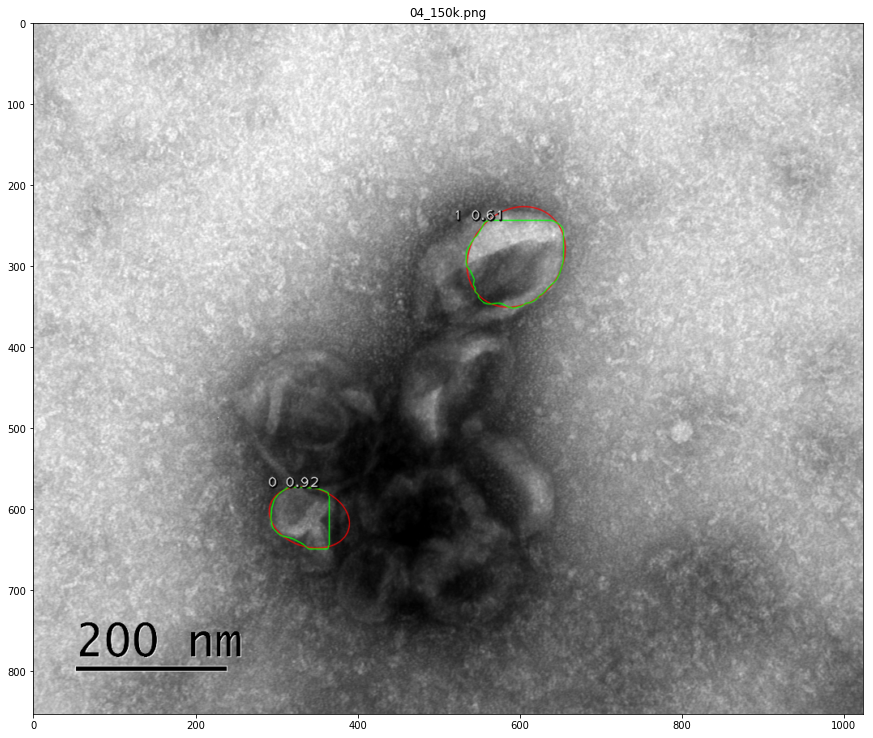

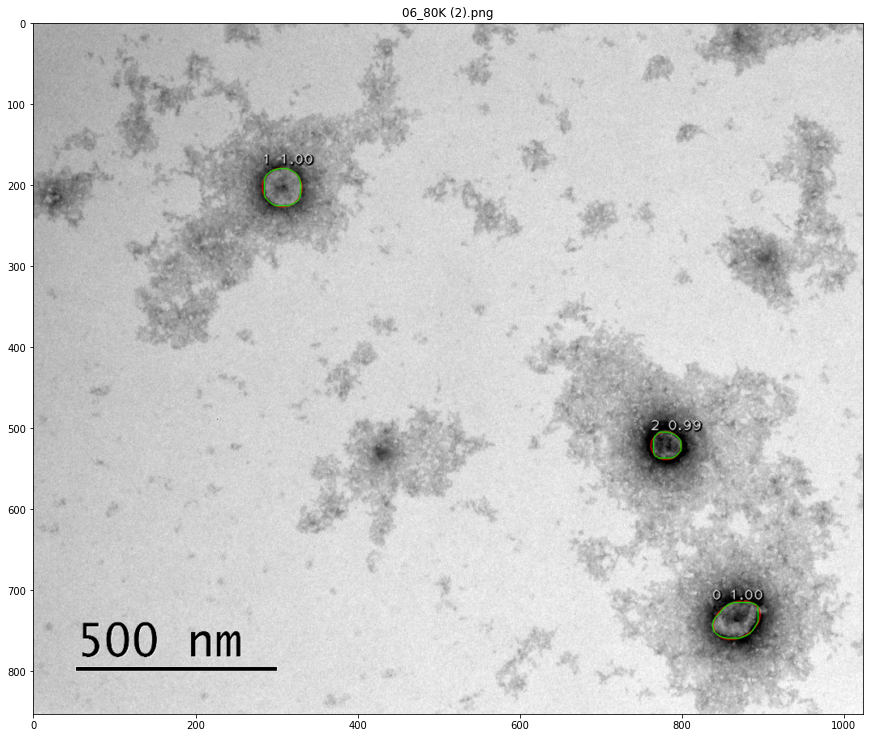

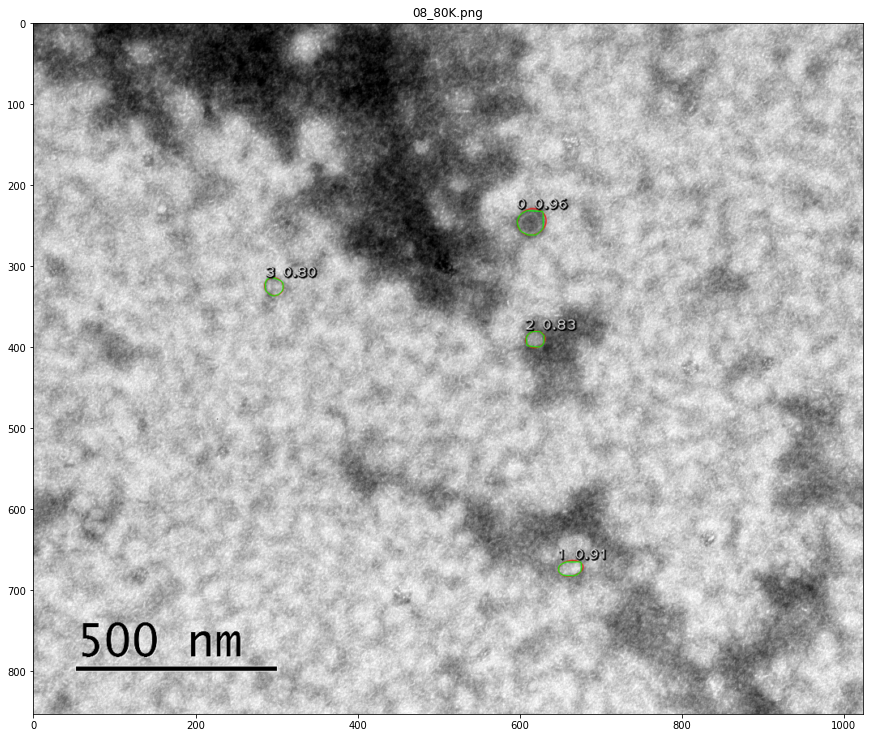

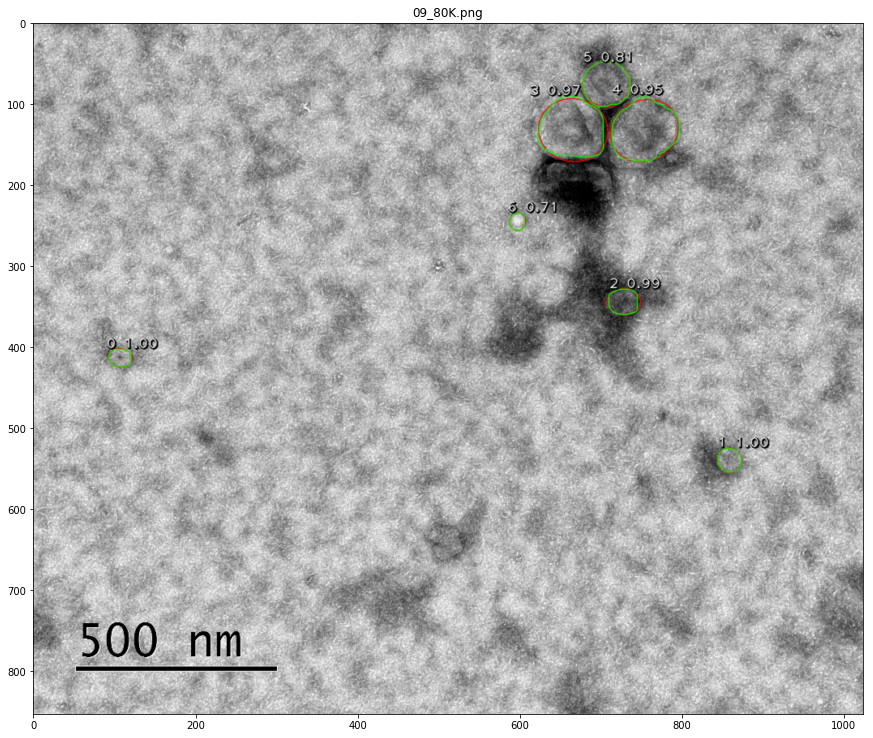

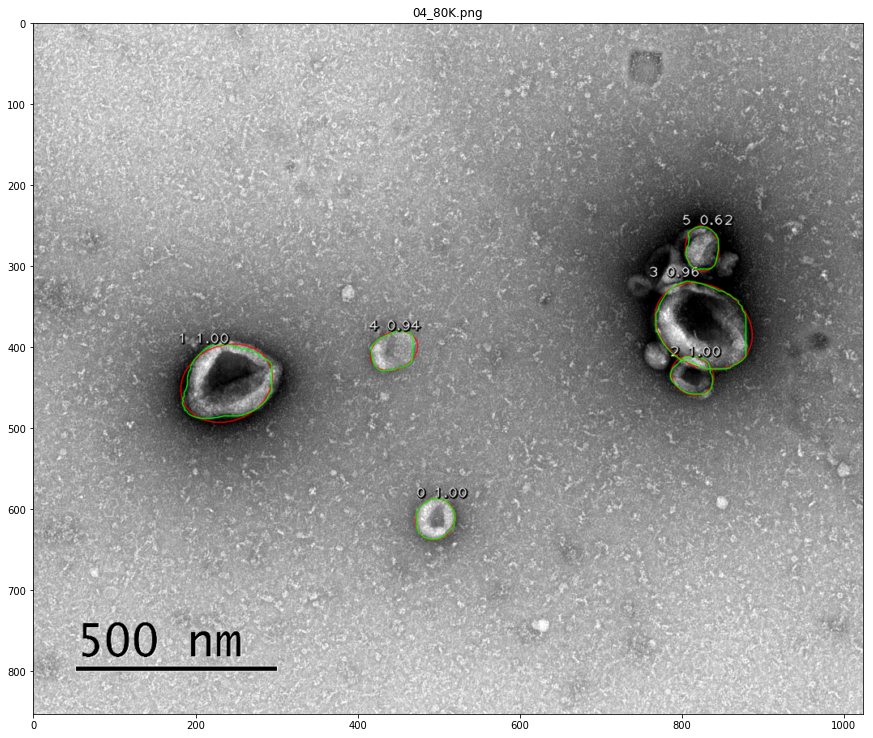

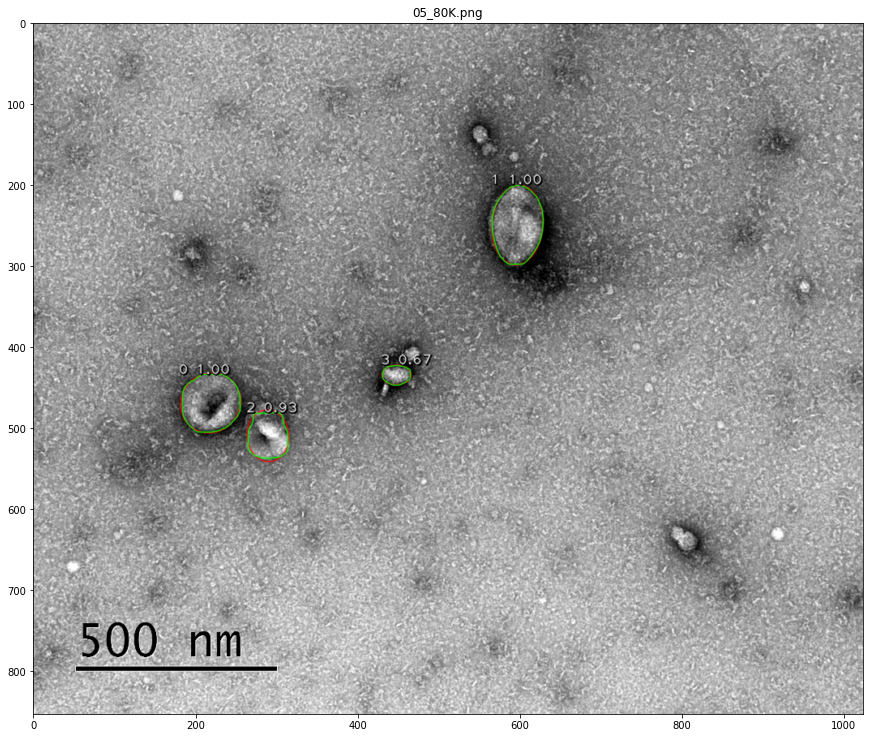

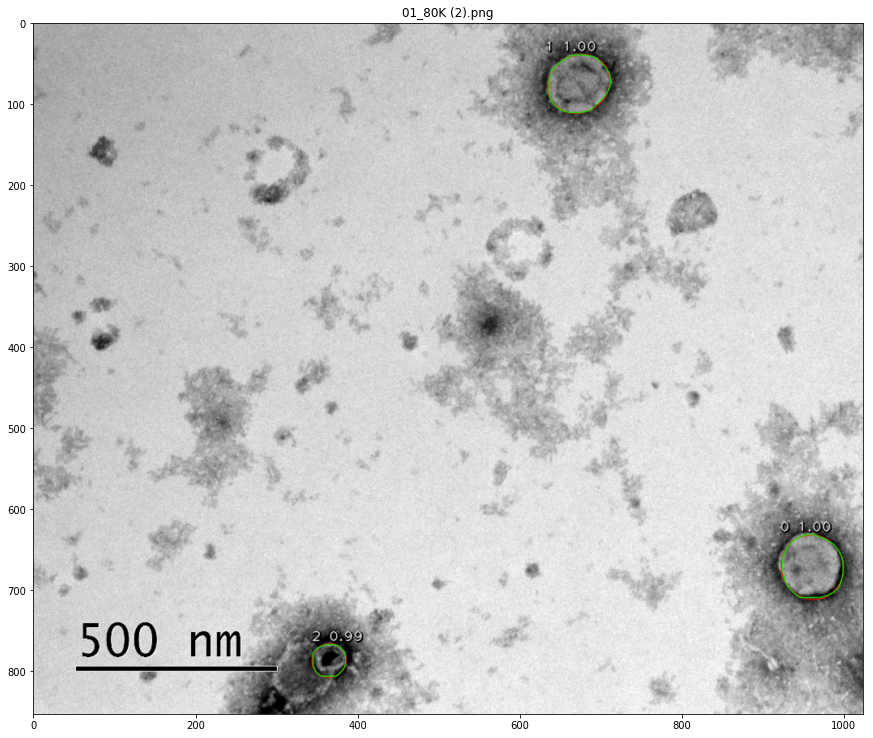

In [23]:
n = len(results)
for i, name in enumerate(results):
    image = imgs_copy[name]
    plt.figure(figsize=(15, 15 * n))
    plt.subplot(n, 1, i + 1)
    plt.title(name)
    plt.imshow(image[:, :, ::-1], interpolation='bilinear')
    plt.show()